In [46]:
import torch
import torch.nn as nn
import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
#getting the data

df = pd.read_csv('diabetes.csv')
data = df.to_numpy().astype(np.float32)

#Shuffle the rows from data so I could take arbitrary rows for test and training.
rd.shuffle(data)
pivo = round(data.shape[0]*0.66)
train_set = data[:pivo,:]
test_set = data[pivo:,:]

#train data
X_train = train_set[:,:-1]
Y_train = train_set[:,-1:]
Xm_train = np.mean(X_train, axis=0)
Xs_train = np.std(X_train, axis=0)
input = (X_train-Xm_train)/Xs_train

#test data
X_test = test_set[:,:-1]
Y_test = test_set[:,-1:]
Xm_test = np.mean(X_test, axis=0)
Xs_test = np.std(X_test, axis=0)
input_tst = (X_test-Xm_test)/Xs_test

In [109]:
#model

model = nn.Sequential(
  nn.Linear(X_train.shape[1], 1),
  nn.Sigmoid()
)

#loss and optimizer

criterion = nn.BCELoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=0.001)

#converting data to torch tensors

input_tensor = torch.from_numpy(input)
targets = torch.from_numpy(Y_train)

input_tst_tensor = torch.from_numpy(input_tst)
targets_tst = torch.from_numpy(Y_test)

In [110]:
#training the model

n_epochs = 100000
train_losses = np.zeros(n_epochs) 
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  optimizer.zero_grad()
  #training loss
  outputs = model(input_tensor)
  loss = criterion(outputs, targets)
  #optimize
  loss.backward()
  optimizer.step()
  #test loss
  outputs_tst = model(input_tst_tensor)
  loss_tst = criterion(outputs_tst, targets_tst)
  #save the losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_tst.item()
  
  if (it+1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_tst.item():.4f}')


Epoch 50/100000, Train Loss: 0.7539, Test Loss: 0.7264
Epoch 100/100000, Train Loss: 0.7463, Test Loss: 0.7204
Epoch 150/100000, Train Loss: 0.7390, Test Loss: 0.7147
Epoch 200/100000, Train Loss: 0.7319, Test Loss: 0.7092
Epoch 250/100000, Train Loss: 0.7250, Test Loss: 0.7039
Epoch 300/100000, Train Loss: 0.7184, Test Loss: 0.6987
Epoch 350/100000, Train Loss: 0.7120, Test Loss: 0.6938
Epoch 400/100000, Train Loss: 0.7059, Test Loss: 0.6890
Epoch 450/100000, Train Loss: 0.6999, Test Loss: 0.6844
Epoch 500/100000, Train Loss: 0.6941, Test Loss: 0.6800
Epoch 550/100000, Train Loss: 0.6885, Test Loss: 0.6757
Epoch 600/100000, Train Loss: 0.6831, Test Loss: 0.6716
Epoch 650/100000, Train Loss: 0.6779, Test Loss: 0.6676
Epoch 700/100000, Train Loss: 0.6728, Test Loss: 0.6638
Epoch 750/100000, Train Loss: 0.6679, Test Loss: 0.6600
Epoch 800/100000, Train Loss: 0.6632, Test Loss: 0.6565
Epoch 850/100000, Train Loss: 0.6586, Test Loss: 0.6530
Epoch 900/100000, Train Loss: 0.6541, Test Loss: 

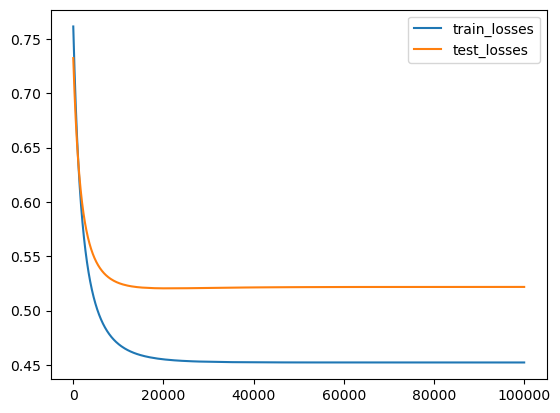

In [111]:
#Tendency of the losses
plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()
plt.show()

In [112]:
#Accuracy

with torch.no_grad():
  p_train = model(input_tensor)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(targets.numpy() == p_train)

  p_test = model(input_tst_tensor)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(targets_tst.numpy() == p_test)
print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

Train acc: 0.8008, Test acc: 0.7165
